### Using the NYC Yellow Taxi Trips dataset (https://www.kaggle.com/nyctaxi/yellow-taxis), we'll try to predict whether or not a cab driver is going to get a tip from his passengers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime, time

In [2]:
df = pd.read_csv('1january.csv')

In [3]:
df.head(20)

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-01-01 00:00:00,40.73470,-73.99037,1.10,2,2016-01-01 00:00:00,40.73241,-73.98184,7.5,0.0,1.3,0.00,8.80,2
1,2016-01-01 00:00:00,40.72991,-73.98078,4.90,5,2016-01-01 00:00:00,40.71668,-73.94447,18.0,0.0,1.3,0.00,19.30,1
2,2016-01-01 00:00:00,40.67957,-73.98455,10.54,1,2016-01-01 00:00:00,40.78893,-73.95027,33.0,0.0,1.3,0.00,34.30,1
3,2016-01-01 00:00:00,40.71899,-73.99347,4.75,1,2016-01-01 00:00:00,40.65733,-73.96224,16.5,0.0,0.8,0.00,17.30,2
4,2016-01-01 00:00:00,40.78133,-73.96062,1.76,3,2016-01-01 00:00:00,40.75851,-73.97726,8.0,0.0,0.8,0.00,8.80,2
5,2016-01-01 00:00:00,40.74305,-73.98012,5.52,2,2016-01-01 00:18:30,40.76314,-73.91349,19.0,0.0,1.3,0.00,20.30,2
6,2016-01-01 00:00:00,40.71999,-73.99406,7.45,2,2016-01-01 00:26:45,40.78987,-73.96636,26.0,0.0,1.3,0.00,27.30,2
7,2016-01-01 00:00:01,40.74461,-73.97942,1.20,1,2016-01-01 00:11:55,40.75394,-73.99203,9.0,0.0,1.3,0.00,10.30,2
8,2016-01-01 00:00:02,40.72390,-73.99834,3.21,1,2016-01-01 00:11:08,40.68840,-73.99585,11.5,0.0,1.3,0.00,12.80,2
9,2016-01-01 00:00:02,40.79105,-73.94715,6.00,1,2016-01-01 00:11:14,40.86558,-73.92077,18.0,0.0,1.3,0.00,19.30,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906858 entries, 0 to 10906857
Data columns (total 14 columns):
pickup_datetime      object
pickup_latitude      float64
pickup_longitude     float64
trip_distance        float64
passenger_count      int64
dropoff_datetime     object
dropoff_latitude     float64
dropoff_longitude    float64
fare_amount          float64
tolls_amount         float64
taxes_amount         float64
tip_amount           float64
payment_amount       float64
payment_type         int64
dtypes: float64(10), int64(2), object(2)
memory usage: 1.1+ GB


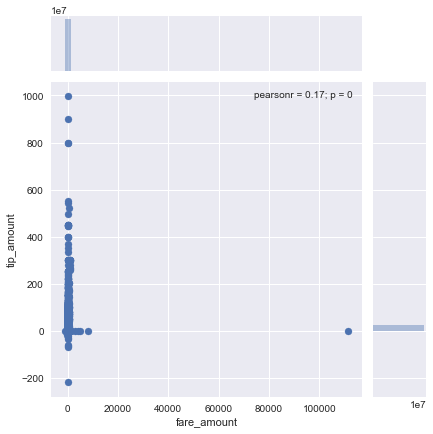

In [5]:
sns.jointplot(x='fare_amount', y='tip_amount', data=df)

### Drop geocoordinate columns as they only confuse the model as is - could be useful if we could turn them into zipcodes, but that is over a million reverse geocoding calls...

In [6]:
df = df.drop('pickup_latitude',1)
df = df.drop('pickup_longitude',1)
df = df.drop('dropoff_latitude',1)
df = df.drop('dropoff_longitude',1)

### Drop some bad outliers indicated by the plot above

In [7]:
df = df.drop(df[df['fare_amount'] > 1000].index)   # Abnormally expensive fairs. Don't think anyone is really spending $100,000 on a taxi ride
df = df.drop(df[df['fare_amount'] < 0].index)    # Negative fairs. What, taxi driver got mugged? Don't think so.
df = df.drop(df[df['tip_amount'] < 0].index)    # Negative tips. Taxi driver mugged passenger?
df = df.drop(df[df['payment_amount'] < 0].index)   # Somehow I don't see cabbies giving money away.
df = df.drop(df[df['passenger_count'] <= 0].index)    # Drop all entries with 0 passengers.

### Datetime of pickup and drop off is too detailed to be helpful, but some more generalized data based off of this could be useful...

### Extract day of the week: January 1st, 2016 - the first day in our data set - was a Friday, so day % 7 will result in 0 = Thursday, 1 = Friday...6 = Wednesday

In [8]:
def convert_day(x):
    d = datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()
    return d.day % 7

In [9]:
df['day'] = df['pickup_datetime'].apply(lambda x: convert_day(x))

### Extract time of the day as evening (6 pm to midnight: 0); graveyard shift (midnight to 6 am: 1); morning (6 am to noon: 2); or afternoon (noon to 6 pm: 3)

In [10]:
def convert_time(x):
    t = datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time()
    hour = t.hour
    if hour >= 18 and hour <= 23:
        return 0
    elif hour >= 0 and hour <= 5:
        return 1
    elif hour >= 6 and hour <= 11:
        return 2
    elif hour >= 12 and hour <= 17:
        return 3

In [11]:
df['shift'] = df['pickup_datetime'].apply(lambda x: convert_time(x))

In [12]:
df.tail()

,pickup_datetime,trip_distance,passenger_count,dropoff_datetime,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type,day,shift
10906853,2016-01-31 23:59:58,2.20,1,2016-02-01 00:07:36,9.0,0.0,1.3,3.05,13.35,1,3,0
10906854,2016-01-31 23:59:59,0.80,2,2016-02-01 00:07:26,6.5,0.0,1.3,0.00,7.80,1,3,0
10906855,2016-01-31 23:59:59,1.10,1,2016-02-01 00:09:28,8.0,0.0,1.3,0.00,9.30,2,3,0
10906856,2016-01-31 23:59:59,2.64,1,2016-02-01 00:12:16,11.0,0.0,1.3,0.00,12.30,2,3,0
10906857,2016-01-31 23:59:59,3.95,1,2016-02-01 00:13:01,14.0,0.0,1.3,3.06,18.36,1,3,0


### Now drop the datetime columns

In [13]:
df = df.drop('pickup_datetime',1)
df = df.drop('dropoff_datetime',1)

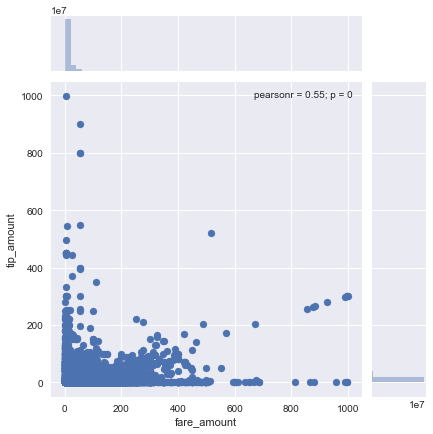

In [14]:
sns.jointplot(x='fare_amount', y='tip_amount', data=df)

In [15]:
total_tips = df['tip_amount'].sum()
average_tip = total_tips / len(df.index)
print('Average tip: ' + str(average_tip))

Average tip: 1.751358136890855


### Create a true/false column for predicting whether a driver receives a tip

In [16]:
did_tip = []
for val in df['tip_amount']:
    if val > 0:
        did_tip.append(1)
    else:
        did_tip.append(0)

In [17]:
did_tip = pd.Series(did_tip)

In [18]:
df['did_tip'] = did_tip.values

### Raw statistical chance passengers will tip:

In [19]:
total_tips = 0
for val in df['did_tip']:
    if val:
        total_tips += 1
        
print(total_tips)
print('chance of tip: ' + str(total_tips/len(df['did_tip'])))

6930989
chance of tip: 0.6357469589168858


In [20]:
from sklearn.cross_validation import train_test_split

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Split dataframe into features and target

In [21]:
df_feat = df.drop('did_tip', 1)
df_target = df['did_tip']

In [22]:
from sklearn import linear_model
from sklearn.metrics import classification_report,confusion_matrix

### Train/Test split (70/30)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30)

### Use a stochastic gradient descent (SGD) linear classifier because we have too many (>100,000) data points for a typical SVC model

### Set the class_weights to 'balanced' from the default of None so they are proportional to frequencies

In [24]:
model = linear_model.SGDClassifier(alpha=0.0001, average=False, class_weight='balanced', epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=3,
        penalty='l2', power_t=0.5, random_state=None, shuffle=True,
        verbose=0, warm_start=False)

In [25]:
model.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=3,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [26]:
predictions = model.predict(X_test)

In [27]:
print(confusion_matrix(y_test,predictions))
print(predictions)

[[1179544   10676]
 [  43523 2036893]]
[1 1 0 ..., 1 1 0]


In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98   1190220
          1       0.99      0.98      0.99   2080416

avg / total       0.98      0.98      0.98   3270636



### 98% accuracy in predicting whether or not a passenger's trip will result in a tip for the driver

## Let's test it on completely unseen data from April of that year and see if the change of month has an impact on accuracy

In [29]:
april = pd.read_csv('4april.csv')

In [30]:
april = april.drop('pickup_latitude',1)
april = april.drop('pickup_longitude',1)
april = april.drop('dropoff_latitude',1)
april = april.drop('dropoff_longitude',1)

In [31]:
april = april.drop(april[april['fare_amount'] > 1000].index)   # Abnormally expensive fairs. Don't think anyone is really spending $100,000 on a taxi ride
april = april.drop(april[april['fare_amount'] < 0].index)    # Negative fairs. What, taxi driver got mugged? Don't think so.
april = april.drop(april[april['tip_amount'] < 0].index)    # Negative tips. Taxi driver tipped passenger?
april = april.drop(april[april['payment_amount'] < 0].index)   # Somehow I don't see cabbies giving money away.
april = april.drop(april[april['passenger_count'] <= 0].index)    # Drop all entries with 0 passengers.

In [32]:
april['day'] = april['pickup_datetime'].apply(lambda x: convert_day(x))

In [33]:
april['shift'] = april['pickup_datetime'].apply(lambda x: convert_time(x))

In [34]:
april = april.drop('pickup_datetime',1)
april = april.drop('dropoff_datetime',1)

In [35]:
did_tip = []
for val in april['tip_amount']:
    if val > 0:
        did_tip.append(1)
    else:
        did_tip.append(0)

did_tip = pd.Series(did_tip)
april['did_tip'] = did_tip.values

In [36]:
april_feat = april.drop('did_tip', 1)
april_target = april['did_tip']

In [37]:
predictions = model.predict(april_feat)

In [38]:
print(confusion_matrix(april_target,predictions))
print(predictions)

[[4201218   48138]
 [ 153260 7518833]]
[1 0 1 ..., 1 1 1]


In [39]:
print(classification_report(april_target,predictions))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98   4249356
          1       0.99      0.98      0.99   7672093

avg / total       0.98      0.98      0.98  11921449



### Again, 98% accuracy - great!